In [1]:
from pathlib import Path, PosixPath
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import shutil
import matplotlib.pyplot as plt

In [2]:
dirpath = os.path.join('COVID-19')
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)

In [3]:
!git clone https://github.com/pcm-dpc/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 1883, done.
remote: Total 1883 (delta 0), reused 0 (delta 0), pack-reused 1883
Receiving objects: 100% (1883/1883), 44.66 MiB | 9.37 MiB/s, done.
Resolving deltas: 100% (1352/1352), done.


In [4]:
%matplotlib inline
def plot_heatmap(df_corr):
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn) # Red Yellow Green
    fig.colorbar(heatmap)

    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

    ax.invert_yaxis() # così row1 col1 sono uguali, row2, col2 idem, etc.
    ax.xaxis.tick_top() # ticks on top e non bottom


    column_labels = df_corr.columns
    row_labels = df_corr.index

    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)

    plt.xticks(rotation=90) # ruoto di 90° i tick sull'asse delle x
    heatmap.set_clim(-1,1)

    for y in range(data.shape[0]):
        for x in range(data.shape[1]):
            plt.text(x + 0.5, y + 0.5, '%.2f' % data[y, x],
                    horizontalalignment='center',
                    verticalalignment='center')



    plt.tight_layout()
    plt.show()

In [5]:
df = pd.read_csv('./COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
df.set_index('data', inplace=True)
df.drop(['stato', 'note_it', 'note_en'], 1, inplace=True)

In [6]:
print("Numero di giorni: ", len(df))
df.tail(5)

Numero di giorni:  45


,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
data,,,,,,,,,,,
2020-04-04T17:00:00,29010,3994,33004,55270,88274,2886,4805,20996,15362,124632,657224
2020-04-05T17:00:00,28949,3977,32926,58320,91246,2972,4316,21815,15887,128948,691461
2020-04-06T17:00:00,28976,3898,32874,60313,93187,1941,3599,22837,16523,132547,721732
2020-04-07T17:00:00,28718,3792,32510,61557,94067,880,3039,24392,17127,135586,755445
2020-04-08T17:00:00,28485,3693,32178,63084,95262,1195,3836,26491,17669,139422,807125


In [7]:
df_corr = df.pct_change().corr(method='pearson')
df_corr.head(3)

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
ricoverati_con_sintomi,1.000000,0.736467,0.994019,0.276596,0.828360,0.484631,0.693238,0.700273,0.625587,0.876001,0.232880
terapia_intensiva,0.736467,1.000000,0.804379,0.409589,0.772674,0.381434,0.443520,0.451930,0.733321,0.794479,0.438935
totale_ospedalizzati,0.994019,0.804379,1.000000,0.308883,0.850400,0.483577,0.673161,0.679163,0.670530,0.895163,0.285509


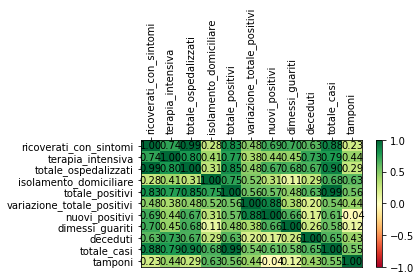

In [8]:
plot_heatmap(df_corr)

In [9]:
#group = df.groupby('denominazione_regione')['denominazione_regione'].count()
#group.head(20)

### Seleziona regione

In [10]:
regione = 'Piemonte'
#regione = 'Lombardia'

In [11]:
df = pd.read_csv('./COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv')
group = df.groupby('denominazione_regione')['denominazione_regione'].count()
df_regione = df.loc[df['denominazione_regione'] == regione]

In [12]:
df_regione.tail()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
852,2020-04-04T17:00:00,ITA,1,Piemonte,45.073274,7.680687,3441,450,3891,5802,9693,563,813,888,1128,11709,37181,NaN,NaN
873,2020-04-05T17:00:00,ITA,1,Piemonte,45.073274,7.680687,3472,444,3916,6261,10177,484,653,1017,1168,12362,38539,NaN,NaN
894,2020-04-06T17:00:00,ITA,1,Piemonte,45.073274,7.680687,3484,438,3922,6623,10545,368,562,1128,1251,12924,41123,NaN,NaN
915,2020-04-07T17:00:00,ITA,1,Piemonte,45.073274,7.680687,3553,432,3985,6719,10704,159,419,1320,1319,13343,44121,NaN,NaN
936,2020-04-08T17:00:00,ITA,1,Piemonte,45.073274,7.680687,3493,423,3916,7073,10989,285,540,1516,1378,13883,48495,NaN,NaN


In [13]:
df_regione.set_index('data', inplace=True)
df_regione.drop(['stato', 'codice_regione', 'denominazione_regione', 'lat', 'long', 'note_it', 'note_en'], 1, inplace=True)

In [14]:
df_corr = df_regione.pct_change().corr(method='pearson')
df_corr.head(3)

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
ricoverati_con_sintomi,1.000000,0.520088,0.976207,0.028334,0.775334,-0.318645,-0.319779,-0.192603,0.035465,0.773583,0.617235
terapia_intensiva,0.520088,1.000000,0.754742,-0.038927,0.429862,0.298420,0.268635,0.387733,0.554078,0.435379,0.191028
totale_ospedalizzati,0.976207,0.754742,1.000000,0.152191,0.813326,-0.302264,-0.300313,-0.172721,0.116188,0.811985,0.575668


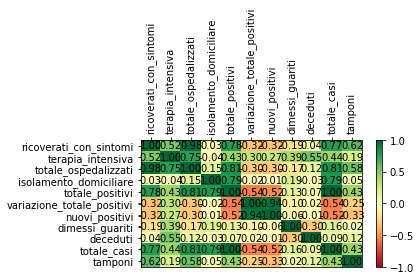

In [15]:
plot_heatmap(df_corr)

### Correlazione tamponi-casi

In [16]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

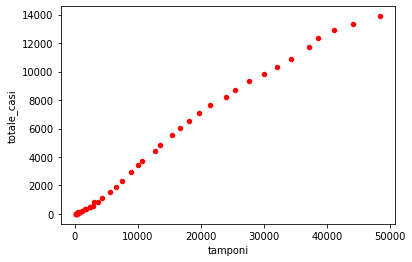

In [17]:
df_regione.plot(kind='scatter',x='tamponi',y='totale_casi',color='red')
#plt.show()

### Correlazione generale

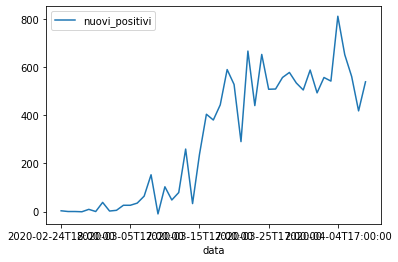

In [18]:
#df_regione[['totale_casi', 'nuovi_attualmente_positivi']].plot()
df_regione[['nuovi_positivi']].plot()
#plt.show()

### Andamento generale

In [19]:
df_regione['incremento'] = df_regione['totale_casi'].pct_change() * 100

In [20]:
df_regione['incremento']

data
2020-02-24T18:00:00           NaN
2020-02-25T18:00:00      0.000000
2020-02-26T18:00:00      0.000000
2020-02-27T18:00:00    -33.333333
2020-02-28T18:00:00    450.000000
2020-02-29T17:00:00      0.000000
2020-03-01T17:00:00    345.454545
2020-03-02T18:00:00      4.081633
2020-03-03T18:00:00      9.803922
2020-03-04T17:00:00     46.428571
2020-03-05T17:00:00     31.707317
2020-03-06T17:00:00     32.407407
2020-03-07T18:00:00     44.755245
2020-03-08T18:00:00     73.913043
2020-03-09T18:00:00     -2.777778
2020-03-10T18:00:00     29.428571
2020-03-11T17:00:00     10.596026
2020-03-12T17:00:00     15.768463
2020-03-13T17:00:00     44.827586
2020-03-14T17:00:00      3.928571
2020-03-15T17:00:00     27.262314
2020-03-16T17:00:00     36.453645
2020-03-17T17:00:00     25.131926
2020-03-18T17:00:00     23.405377
2020-03-19T17:00:00     25.245622
2020-03-20T17:00:00     18.042292
2020-03-21T17:00:00      8.407975
2020-03-22T17:00:00     17.803838
2020-03-23T17:00:00      9.977376
2020-03-2

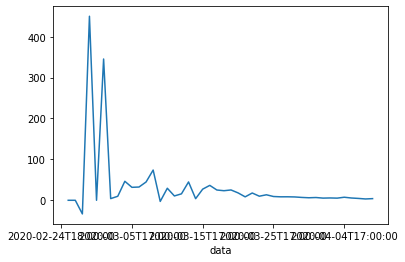

In [21]:
df_regione['incremento'].plot()
#plt.show()

In [22]:
df_regione.tail()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,incremento
data,,,,,,,,,,,,
2020-04-04T17:00:00,3441,450,3891,5802,9693,563,813,888,1128,11709,37181,7.461454
2020-04-05T17:00:00,3472,444,3916,6261,10177,484,653,1017,1168,12362,38539,5.576907
2020-04-06T17:00:00,3484,438,3922,6623,10545,368,562,1128,1251,12924,41123,4.546190
2020-04-07T17:00:00,3553,432,3985,6719,10704,159,419,1320,1319,13343,44121,3.242030
2020-04-08T17:00:00,3493,423,3916,7073,10989,285,540,1516,1378,13883,48495,4.047066
